<b>Dataset FD001</b>

<u>Meta info:</u>  

Data Set: FD001  
Train trajectories: 100  
Test trajectories: 100  
Conditions: ONE (Sea Level)  
Fault Modes: ONE (HPC Degradation) - High Pressure Compressor 

No information on what a sensor has been measuring 

In [40]:
#!pip install pyforest
import pyforest

#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score




In [41]:
dir_path = '/Users/akul/Desktop/AirplanesDataNASA/CMAPSSData/'

# define column names for easy indexing
index_names = ['unit_nr', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['s_{}'.format(i) for i in range(1,22)] 
col_names = index_names + setting_names + sensor_names

# read data
train = pd.read_csv((dir_path +'train_FD001.txt'), sep='\s+', header=None, names=col_names)
test = pd.read_csv((dir_path+'test_FD001.txt'), sep='\s+', header=None, names=col_names)
y_test = pd.read_csv((dir_path+'RUL_FD001.txt'), sep='\s+', header=None, names=['RUL'])

# inspect first few rows
train.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,unit_nr,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [42]:
print(train.unit_nr.unique()) #This means that there are 100 engines that we're dealing with in 'train_FD001.txt'
#train.shape

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]


## Initial EDA

### Index_names

In [43]:
train[index_names].describe() #Summary Stats of 2 columns under the heading "index_names".

,unit_nr,time_cycles
count,20631.000000,20631.000000
mean,51.506568,108.807862
std,29.227633,68.880990
min,1.000000,1.000000
25%,26.000000,52.000000
50%,52.000000,104.000000
75%,77.000000,156.000000
max,100.000000,362.000000


In [44]:
#summary stats of all engines. 
train[index_names].groupby('unit_nr').describe().head()

time_cycles                                                    
              count   mean        std  min    25%    50%     75%    max
unit_nr                                                                
1             192.0   96.5  55.569776  1.0  48.75   96.5  144.25  192.0
2             287.0  144.0  82.993976  1.0  72.50  144.0  215.50  287.0
3             179.0   90.0  51.816986  1.0  45.50   90.0  134.50  179.0
4             189.0   95.0  54.703748  1.0  48.00   95.0  142.00  189.0
5             269.0  135.0  77.797815  1.0  68.00  135.0  202.00  269.0

In [45]:
#Summary stats of the "max" column of "Summary stats of all engines." Check immediate previous chunk and you'll
#find the column "max". 
train[index_names].groupby('unit_nr').max().describe()

,time_cycles
count,100.000000
mean,206.310000
std,46.342749
min,128.000000
25%,177.000000
50%,199.000000
75%,229.250000
max,362.000000


### Setting_names

In [46]:
train[setting_names].describe()
#Only 1 operating condition since SD is relatively the same with negligible fluctuations

,setting_1,setting_2,setting_3
count,20631.000000,20631.000000,20631.0
mean,-0.000009,0.000002,100.0
std,0.002187,0.000293,0.0
min,-0.008700,-0.000600,100.0
25%,-0.001500,-0.000200,100.0
50%,0.000000,0.000000,100.0
75%,0.001500,0.000300,100.0
max,0.008700,0.000600,100.0


### Sensor_names

In [47]:
sensor_stats = train[sensor_names].describe().transpose()
sensor_stats.head()

,count,mean,std,min,25%,50%,75%,max
s_1,20631.0,518.670000,6.537152e-11,518.67,518.670,518.67,518.670,518.67
s_2,20631.0,642.680934,5.000533e-01,641.21,642.325,642.64,643.000,644.53
s_3,20631.0,1590.523119,6.131150e+00,1571.04,1586.260,1590.10,1594.380,1616.91
s_4,20631.0,1408.933782,9.000605e+00,1382.25,1402.360,1408.04,1414.555,1441.49
s_5,20631.0,14.620000,3.394700e-12,14.62,14.620,14.62,14.620,14.62


In [48]:
sensor_stats["abs(50% - min)"] = abs(sensor_stats["min"] - sensor_stats["50%"])
sensor_stats["abs(max-50%)"] = abs(sensor_stats["max"] - sensor_stats["50%"])
sensor_stats

,count,mean,std,min,25%,50%,75%,max,abs(50% - min),abs(max-50%)
s_1,20631.0,518.670000,6.537152e-11,518.6700,518.6700,518.6700,518.6700,518.6700,0.0000,0.0000
s_2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300,1.4300,1.8900
s_3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100,19.0600,26.8100
s_4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900,25.7900,33.4500
s_5,20631.0,14.620000,3.394700e-12,14.6200,14.6200,14.6200,14.6200,14.6200,0.0000,0.0000
s_6,20631.0,21.609803,1.388985e-03,21.6000,21.6100,21.6100,21.6100,21.6100,0.0100,0.0000
s_7,20631.0,553.367711,8.850923e-01,549.8500,552.8100,553.4400,554.0100,556.0600,3.5900,2.6200
s_8,20631.0,2388.096652,7.098548e-02,2387.9000,2388.0500,2388.0900,2388.1400,2388.5600,0.1900,0.4700
s_9,20631.0,9065.242941,2.208288e+01,9021.7300,9053.1000,9060.6600,9069.4200,9244.5900,38.9300,183.9300
s_10,20631.0,1.300000,4.660829e-13,1.3000,1.3000,1.3000,1.3000,1.3000,0.0000,0.0000


Inspecting sensors with little or no statistical fluctuations via boxplot analysis.

<AxesSubplot:>

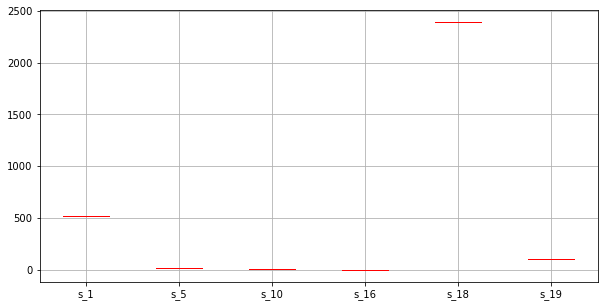

In [49]:
#no fluctuations
train.boxplot(column = ["s_1", "s_5", "s_10", "s_16", "s_18", "s_19"], color = "red")

<AxesSubplot:>

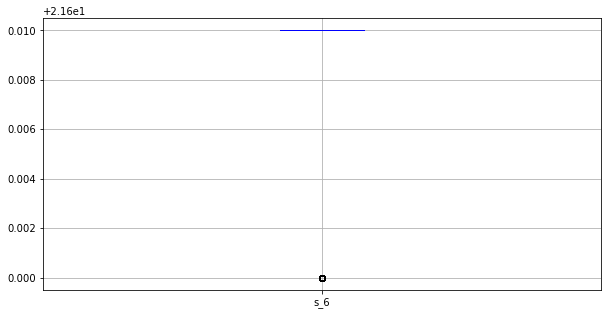

In [50]:
# Negligible fluctuations
train.boxplot(column = "s_6", color = "blue")

<AxesSubplot:>

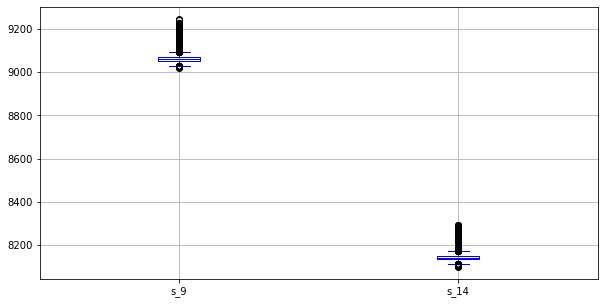

In [51]:
#Highest fluctuations/variability within features 
train.boxplot(column = ["s_9", "s_14"], color = "blue")


AxesSubplot(0.125,0.125;0.775x0.755)


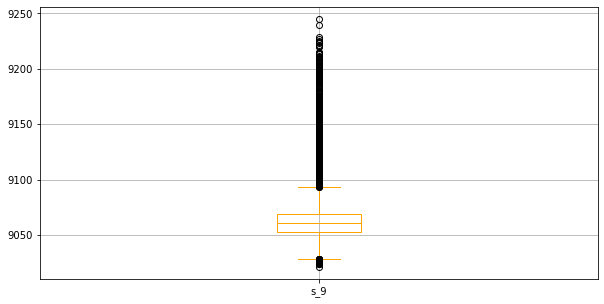

In [52]:
# Separating box plots for an in depth analysis of high variability

#### Feature s_9 ####

print(train.boxplot(column = "s_9", color = "orange"))


<AxesSubplot:>

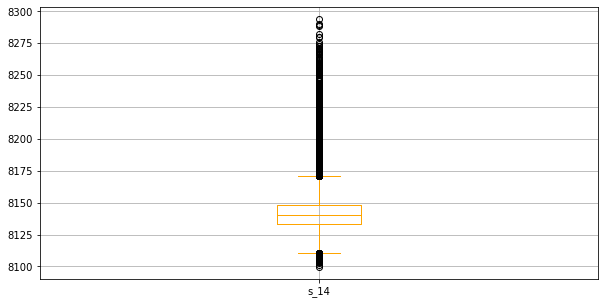

In [53]:
#### Feature s_14 ####
train.boxplot(column = "s_14", color = "orange")

In [54]:
#Sensors 1, 5, 10, 16 18 and 19 do not fluctuate at all, these can be safely discarded. 
#Sensor s_6 shows slightly more fluctuation than sensors with no fluctuations at all.

# Computation of Remaining Useful Life (RUL)

In [55]:
### IMPORTANT INFORMATION 

#With no information about the RUL of engines in the training set,
#We’ll assume the RUL decreases linearly over time and have a value of 0 at the last time cycle of the engine.
#This assumption implies RUL would be 10 at 10 cycles before breakdown, 50 at 50 cycles before breakdown, etc.




# Mathematically we can use "max_time_cycle — time_cycle" to
# compute our desired RUL. Since we want to take the max_time_cycle 
# of each engine into account, we’ll group the dataframe by unit_nr before computing max_time_cycle.
# The max_time_cycle is then merged back into the dataframe 
# to allow easy calculation of RUL by subtracting the columns max_time_cycle — time_cycle.
# Afterwards we drop max_time_cycle 
# as it’s no longer needed and inspect the first few rows to verify our RUL calculation.

In [56]:
def add_remaining_useful_life(df):
    # Get the total number of cycles for each unit
    grouped_by_unit = df.groupby(by ="unit_nr")
    max_cycle = grouped_by_unit["time_cycles"].max()
    
    # Merge the max cycle back into the original frame
    result_frame = df.merge(max_cycle.to_frame(name='max_cycle'), left_on='unit_nr', right_index=True)
    
    # Calculate remaining useful life for each row
    remaining_useful_life = result_frame["max_cycle"] - result_frame["time_cycles"]
    result_frame["RUL"] = remaining_useful_life
    
    # drop max_cycle as it's no longer needed
    result_frame = result_frame.drop("max_cycle", axis=1)
    return result_frame
  
train = add_remaining_useful_life(train)
train[index_names+['RUL']].head()


,unit_nr,time_cycles,RUL
0,1,1,191
1,1,2,190
2,1,3,189
3,1,4,188
4,1,5,187


In [57]:
train

,unit_nr,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,3
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,1


    unit_nr  RUL
0         1  191
1         2  286
2         3  178
3         4  188
4         5  268
..      ...  ...
95       96  335
96       97  201
97       98  155
98       99  184
99      100  199

[100 rows x 2 columns]


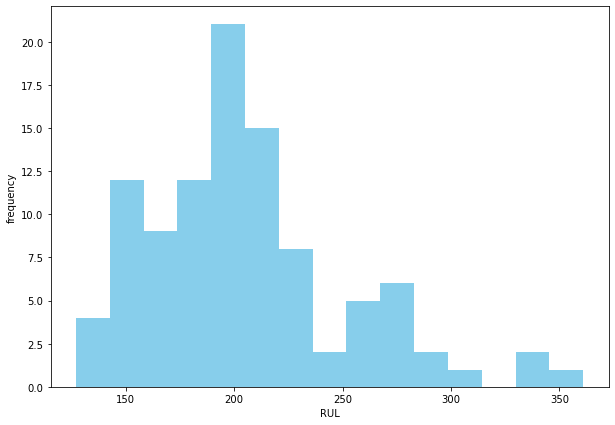

In [58]:
### Histogram of "Max RUL" for visualizing distribution
df_max_rul = train[['unit_nr', 'RUL']].groupby('unit_nr').max().reset_index()
print(df_max_rul)
df_max_rul['RUL'].hist(bins=15, figsize=(10,7), color = "skyblue")
plt.xlabel('RUL')
plt.ylabel('frequency')
plt.grid(None)
plt.show()

In [59]:
# Below is the code used to plot signals of each sensor.
# Due to the large number of engines, it’s not feasible to plot every engine for every sensor. 
# The graphs would no longer be interpret-able with so many lines in one plot. 
# Therefore, I chose to plot each engine whose unit_nr is divisible by 10 with a remainder of 0.
# Revert the X-axis so RUL decreases along the axis, with a RUL of zero indicating engine failure. 

def plot_sensor(sensor_name):
    plt.figure(figsize=(13,5))
    for i in train['unit_nr'].unique():
        if (i % 10 == 0):  # only plot every 10th unit_nr
            plt.plot('RUL', sensor_name, 
                     data=train[train['unit_nr']==i])
    plt.xlim(250, 0)  # reverse the x-axis so RUL counts down to zero
    plt.xticks(np.arange(0, 275, 25))
    plt.ylabel(sensor_name)
    plt.xlabel('Remaining Useful Life')
    #plt.legend(loc="upper left")
    plt.show()

<IPython.core.display.Javascript object>

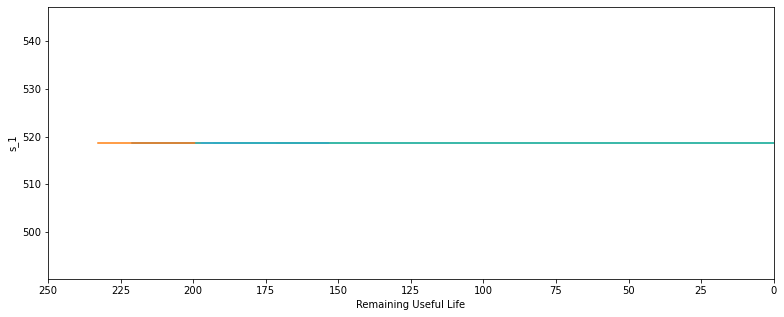

<IPython.core.display.Javascript object>

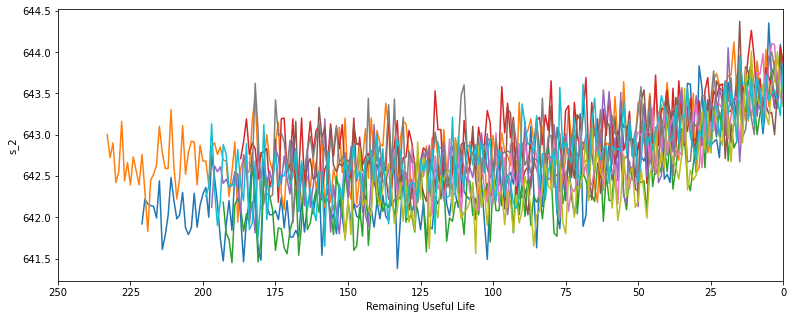

<IPython.core.display.Javascript object>

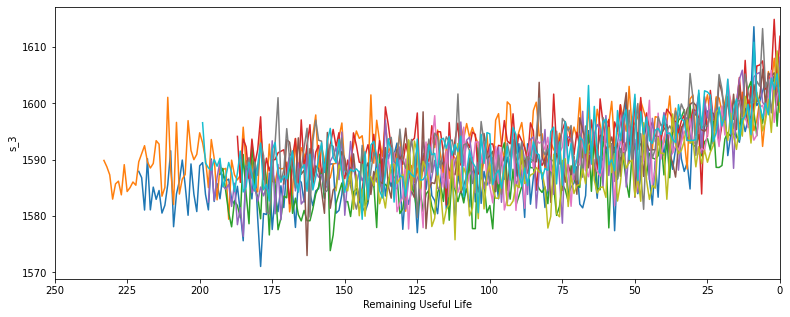

<IPython.core.display.Javascript object>

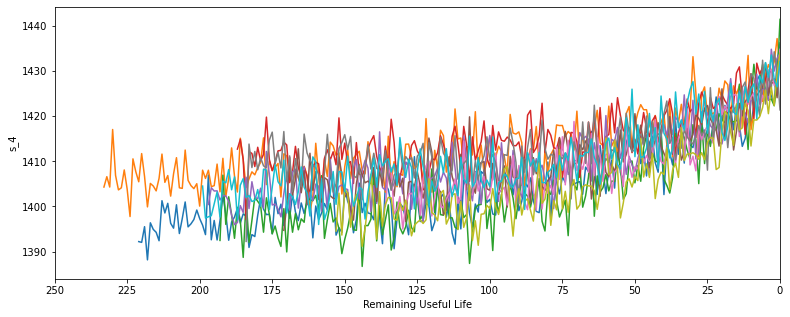

<IPython.core.display.Javascript object>

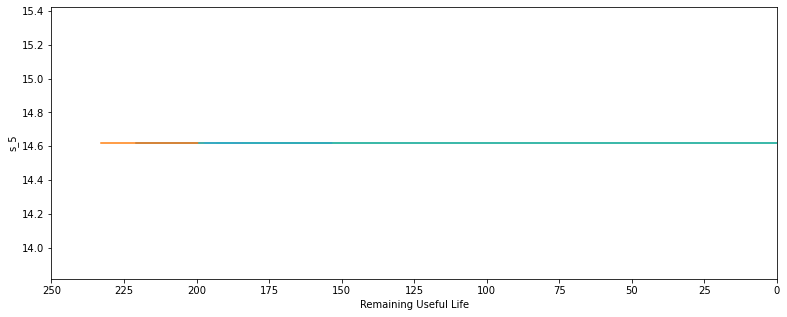

<IPython.core.display.Javascript object>

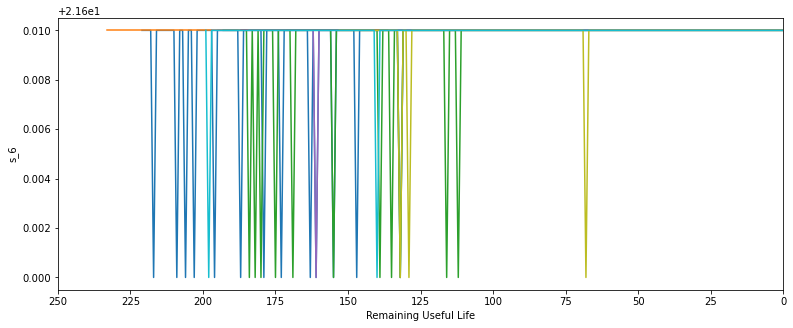

<IPython.core.display.Javascript object>

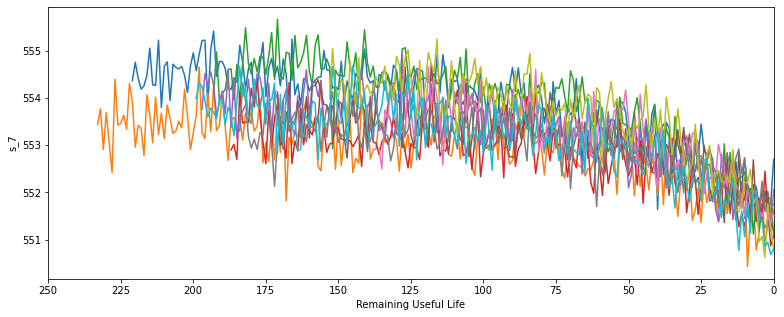

<IPython.core.display.Javascript object>

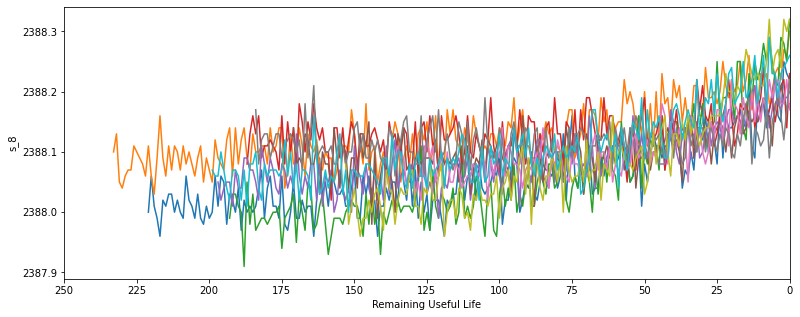

<IPython.core.display.Javascript object>

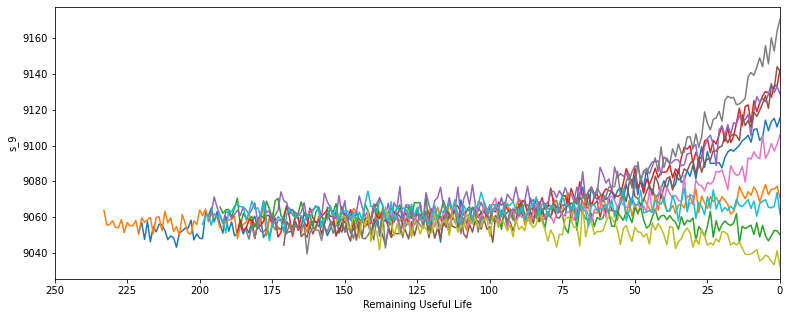

<IPython.core.display.Javascript object>

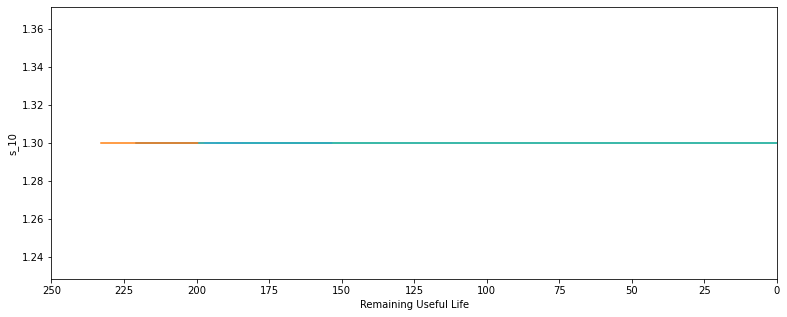

<IPython.core.display.Javascript object>

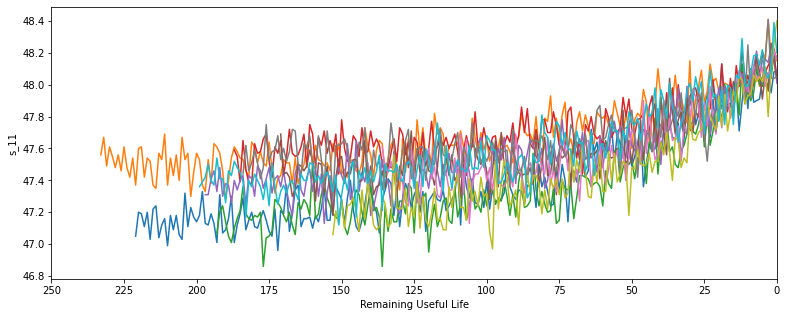

<IPython.core.display.Javascript object>

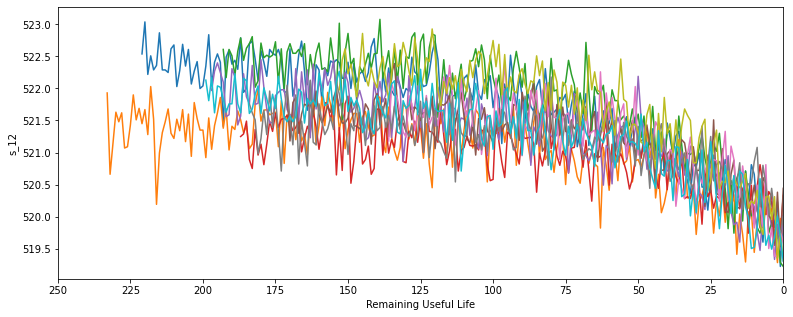

<IPython.core.display.Javascript object>

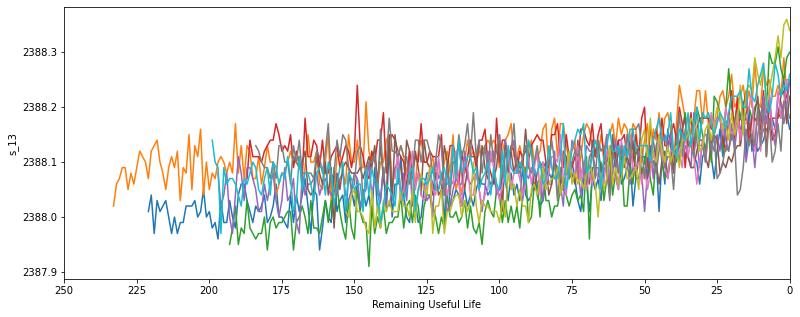

<IPython.core.display.Javascript object>

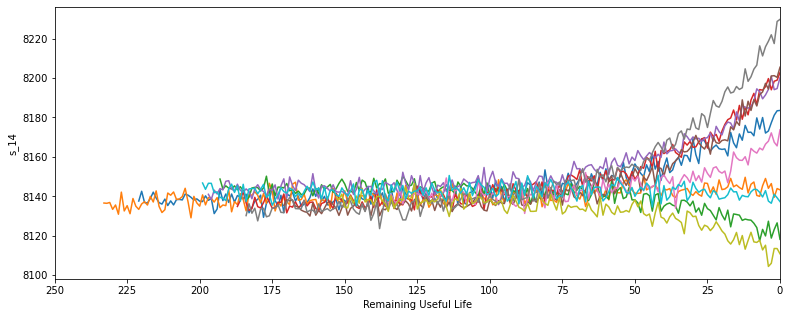

<IPython.core.display.Javascript object>

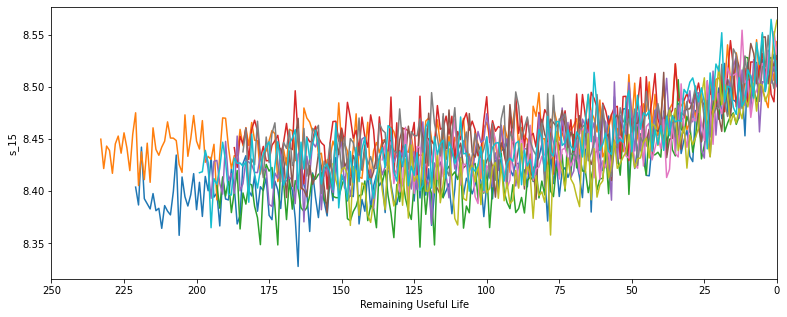

<IPython.core.display.Javascript object>

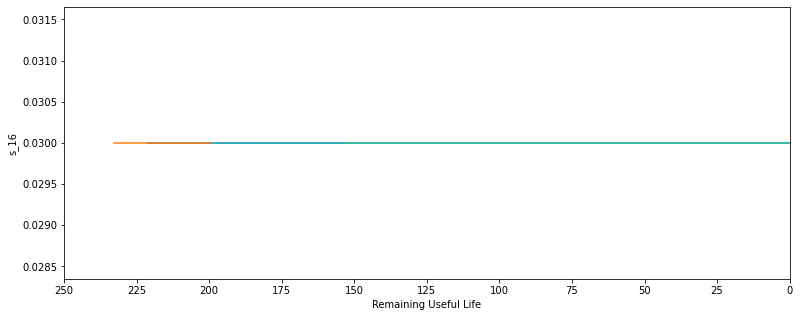

<IPython.core.display.Javascript object>

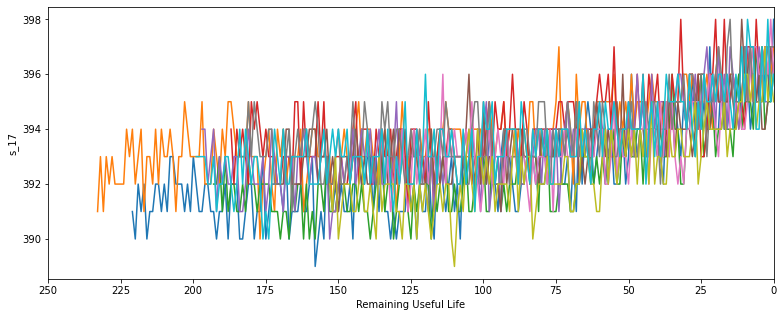

<IPython.core.display.Javascript object>

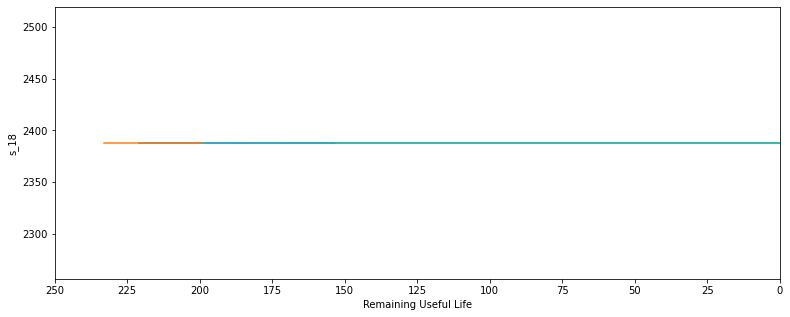

<IPython.core.display.Javascript object>

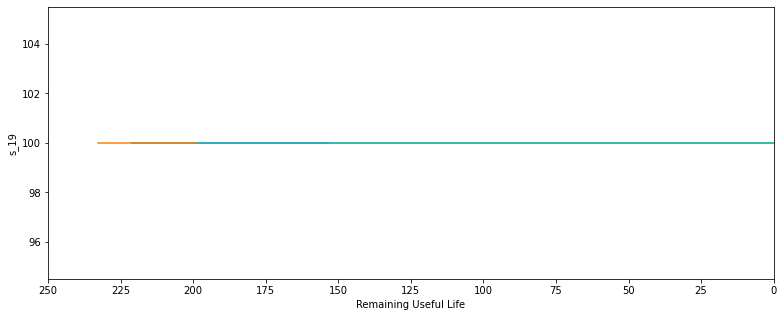

<IPython.core.display.Javascript object>

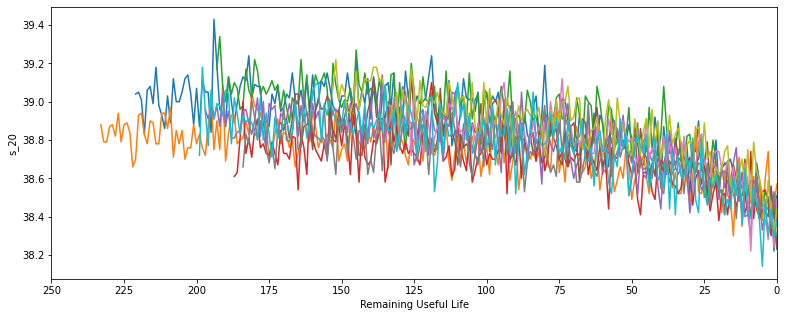

<IPython.core.display.Javascript object>

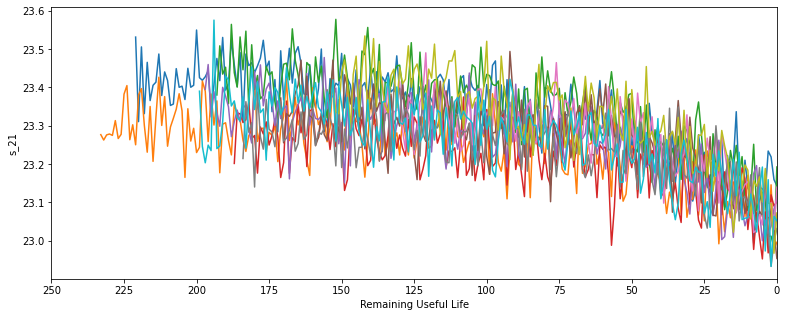

In [60]:
for sensor_name in sensor_names:
    plot_sensor(sensor_name)
    

 The graph of <b> sensors 1, 10, 18 and 19</b> look similar, the flat line indicates the sensors <b> hold no useful information </b>, which reconfirms our conclusion from the descriptive statistics. Sensors <b> 5 and 16 also show a flat line </b>, these can be <b> added to the list of sensors to exclude.</b>


<b> Sensor 2 shows a rising trend </b>, a similar pattern can be seen for <b> sensors 3, 4, 8, 11, 13, 15 and 17.</b>

<b> Readings for sensor 6 peak downwards at times</b> but there <u> doesn’t seem to be a clear relation </u> to the decreasing RUL.

<b> Sensor 7 shows a declining trend </b> , which can also be seen in <b> sensors 12, 20 and 21.</b>

<b> Sensor 9 and 14 </b> <u> have a similar pattern. </u>

In [61]:
# We’ll drop the unit_nr, time_cycle, settings and sensors which hold no information.
# The RUL column of the training set is stored in its own variable. 
# For our test set we drop the same columns. 
# In addition, we are only interested in the last time cycle of each engine in the test set 
# as we only have True RUL values for those records.

def evaluate(y_true, y_hat, label= 'test'):
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    variance = r2_score(y_true, y_hat)
    print('{} set RMSE:{}, R2:{}'.format(label, rmse, variance))



In [62]:
drop_sensors = ['s_1','s_5','s_6','s_10','s_16','s_18','s_19']
drop_labels = index_names+setting_names+drop_sensors

X_train = train.drop(drop_labels, axis=1)
y_train = X_train.pop('RUL')



In [112]:
X_test = test.groupby('unit_nr').last().reset_index().drop(drop_labels, axis=1)
X_test


,s_2,s_3,s_4,s_7,s_8,s_9,s_11,s_12,s_13,s_14,s_15,s_17,s_20,s_21
0,642.58,1581.22,1398.91,554.42,2388.08,9056.40,47.23,521.79,2388.06,8130.11,8.4024,393,38.81,23.3552
1,642.55,1586.59,1410.83,553.52,2388.10,9044.77,47.67,521.74,2388.09,8126.90,8.4505,391,38.81,23.2618
2,642.88,1589.75,1418.89,552.59,2388.16,9049.26,47.88,520.83,2388.14,8131.46,8.4119,395,38.93,23.2740
3,642.78,1594.53,1406.88,552.64,2388.13,9051.30,47.65,521.88,2388.11,8133.64,8.4634,395,38.58,23.2581
4,642.27,1589.94,1419.36,553.29,2388.10,9053.99,47.46,521.00,2388.15,8125.74,8.4362,394,38.75,23.4117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,642.30,1590.88,1397.94,553.99,2388.03,9062.41,47.14,522.30,2388.01,8148.24,8.4110,391,38.96,23.4606
96,642.59,1582.96,1410.92,554.05,2388.06,9076.36,47.38,521.58,2388.06,8155.48,8.4500,395,38.61,23.2953
97,642.68,1599.51,1415.47,553.44,2388.13,9062.34,47.66,521.53,2388.09,8146.39,8.4235,394,38.76,23.3608
98,642.00,1585.03,1397.98,554.75,2388.01,9067.16,47.26,521.82,2388.02,8150.38,8.4003,391,38.95,23.3595


In [64]:
X_train

,s_2,s_3,s_4,s_7,s_8,s_9,s_11,s_12,s_13,s_14,s_15,s_17,s_20,s_21
0,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735
20627,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594
20628,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333
20629,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640


In [65]:
# create and fit model
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict and evaluate
y_hat_train = lm.predict(X_train)
evaluate(y_train, y_hat_train, 'train')

y_hat_test = lm.predict(X_test)
evaluate(y_test, y_hat_test)

<IPython.core.display.Javascript object>

train set RMSE:44.66819159545432, R2:0.5794486527796756


<IPython.core.display.Javascript object>

test set RMSE:31.952633027739513, R2:0.4087736807658261


A possible explanation could be the computed RUL of the training set ranging well into the 300s. Looking at the trend of the graph below, the higher values of linearly computed RUL do not seem to correlate very well with the sensor signal. Since RUL predictions of the test set are closer to failure, and the correlation between the lower target RUL and sensor signal is clearer, it may be easier for the model to make accurate predictions on the test set. The large difference in train and test RMSE can be seen as a flaw of our assumption of RUL and is something we’ll try to improve in the future. For now, we have concluded our EDA and baseline model.


In [90]:
import matplotlib.pyplot as plt
s_12 = train[['unit_nr', 'time_cycles','s_12', 'RUL']]
s_12_10 = s_12[s_12['unit_nr'] == 10] 
s_12_10

,unit_nr,time_cycles,s_12,RUL
1914,10,1,522.54,221
1915,10,2,523.04,220
1916,10,3,522.22,219
1917,10,4,522.51,218
1918,10,5,522.29,217
...,...,...,...,...
2131,10,218,520.23,4
2132,10,219,519.83,3
2133,10,220,520.23,2
2134,10,221,519.22,1


Text(0, 0.5, 'RUL')

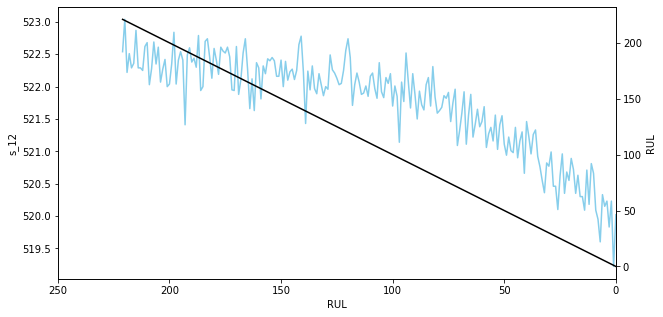

In [110]:
plt.rcParams['figure.figsize'] = [10, 5]
fig, ax1 = plt.subplots()
ax1.plot(s_12_10['RUL'], s_12_10['s_12'], 'skyblue')
plt.xlim(250, 0)

ax1.set_xlabel("RUL")
ax1.set_ylabel("s_12")

ax2 = ax1.twinx()
ax2.plot(s_12_10['RUL'],s_12_10['RUL'], 'black')
ax2.set_ylabel("RUL")







## Updated RUL Assumptions
#### Re Examining RUL 

Looking at the sensor signals (see below), many sensors seem rather constant in the beginning. This is because the engines only develop a fault over time. The bend in the curve of the signal is the first bit of information provided to us that the engine is degrading and the first time it is reasonable to assume RUL is linearly declining. We can’t really say anything about the RUL before that point because we have no information about the initial wear and tear.


We can update our assumption to reflect this logic. Instead of having our RUL decline linearly, we define our RUL to start out as a constant and only decline linearly after some time (see example above). By doing so we achieve two things:  

- Initially constant RUL correlates better with the initially constant mean sensor signal
- Lower peak values for RUL result in lower spread of our target variable, making it easier to fit a line


Consequently, this change allows our regression model to more accurately predict low RUL values, which are often more interesting/critical to predict correctly.

Using pandas, you can simply clip the previously computed linearly declining RUL at the desired upper bound value.  

Testing multiple upper bound values indicated clipping RUL at 125 yielded the biggest improvement for the model. 
As we’re updating our assumption of RUL for the train set, we should include this change in our evaluation. The true RUL of the test set remains untouched. Let’s examine the effect of this change.


In [88]:
## Clipped RUL 
y_train_clipped = y_train.clip(upper=125)
train["clipped_RUL"] = y_train_clipped

# create and fit model
lm = LinearRegression()
lm.fit(X_train, y_train_clipped)

# predict and evaluate
y_hat_train = lm.predict(X_train)
evaluate(y_train_clipped, y_hat_train, 'train')

y_hat_test = lm.predict(X_test)
evaluate(y_test, y_hat_test)

<IPython.core.display.Javascript object>

train set RMSE:21.491018701514896, R2:0.7340432868050575


<IPython.core.display.Javascript object>

test set RMSE:21.90021340689466, R2:0.7222608196545189


In [93]:
train

,unit_nr,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,RUL,clipped_RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191,125
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190,125
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189,125
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188,125
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,4,4
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,3,3
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,1,1


In [91]:
train

,unit_nr,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,RUL,clipped_RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191,125
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190,125
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189,125
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188,125
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,4,4
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,3,3
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,1,1


In [97]:
# For plotting only

s_12_v2 = train[['unit_nr', 'time_cycles','s_12', 'RUL', 'clipped_RUL']]
s_12_v2
s_12_10_v2 = s_12_v2[s_12_v2['unit_nr'] == 10] 
s_12_10_v2




,unit_nr,time_cycles,s_12,RUL,clipped_RUL
1914,10,1,522.54,221,125
1915,10,2,523.04,220,125
1916,10,3,522.22,219,125
1917,10,4,522.51,218,125
1918,10,5,522.29,217,125
...,...,...,...,...,...
2131,10,218,520.23,4,4
2132,10,219,519.83,3,3
2133,10,220,520.23,2,2
2134,10,221,519.22,1,1


Text(0, 0.5, 'RUL')

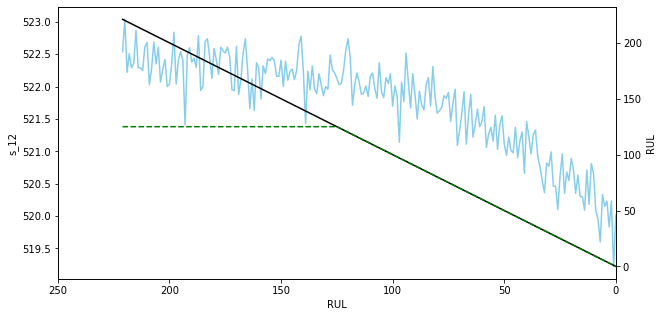

In [109]:
plt.rcParams['figure.figsize'] = [10, 5]
fig, ax1 = plt.subplots()
ax1.plot(s_12_10['RUL'], s_12_10['s_12'], 'skyblue')
plt.xlim(250, 0)

ax1.set_xlabel("RUL")
ax1.set_ylabel("s_12")

ax2 = ax1.twinx()
ax2.plot(s_12_10['RUL'],s_12_10['RUL'], 'black')
ax2.plot(s_12_10['RUL'],s_12_10_v2['clipped_RUL'], 'g', linestyle = 'dashed')
ax2.set_ylabel("RUL")



## Support Vector Regression

![Random Unsplash Image](https://i.stack.imgur.com/ZyGQp.png)



## Hyperparameters $\epsilon$ and $c$ in SVR

### Parameter $\epsilon$

![title](https://machine-learning-and-data-science-with-python.readthedocs.io/en/latest/_images/support_vector_machine.png)

### Parameter C 
![Parameter C](https://cdn-images-1.medium.com/max/1600/0*z00-0ici9ikQLBug.jpg)


<i> *Important Note:  As C increases, our tolerance for points outside of ϵ also increases* </i>  
<a href> "https://towardsdatascience.com/an-introduction-to-support-vector-regression-svr-a3ebc1672c2 </a>


<title> Important note: <b> As C increases, our tolerance for points outside of ϵ also increases.</b></title>

In [115]:
from sklearn.svm import SVR

svr = SVR(kernel='linear')
svr.fit(X_train, y_train_clipped)

# predict and evaluate
y_hat_train = svr.predict(X_train)
evaluate(y_train_clipped, y_hat_train, 'train')

y_hat_test = svr.predict(X_test)
evaluate(y_test, y_hat_test)

<IPython.core.display.Javascript object>

train set RMSE:29.57783070266026, R2:0.49623314435506494


<IPython.core.display.Javascript object>

test set RMSE:29.675150117440094, R2:0.49005151605390174


RMSEs are much worse than our Linear Regression with clipped RUL. 

## Data Pre Processing for better RMSE in SVR

### Min Max Scaling

In [121]:
#### Feel free to follow along these website for a better understanding of Min-Max scaliung

# https://medium.com/swlh/data-normalisation-with-r-6ef1d1947970
# https://bit.ly/3rmUvMu 
# http://rasbt.github.io/mlxtend/user_guide/preprocessing/minmax_scaling/




from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVM regression + clipped RUL + scaled
svr = SVR(kernel='linear')
svr.fit(X_train_scaled, y_train_clipped)

# predict and evaluate
y_hat_train = svr.predict(X_train_scaled)
evaluate(y_train_clipped, y_hat_train, 'train')

y_hat_test = svr.predict(X_test_scaled)
evaluate(y_test, y_hat_test, 'test')

<IPython.core.display.Javascript object>

train set RMSE:21.578263975067888, R2:0.7318795396979632


<IPython.core.display.Javascript object>

test set RMSE:21.580480163289597, R2:0.730311354095216


Note the test RMSE of 21.58 is already an improvement upon our linear regression with clipped RUL, which had an RMSE of 21.90. 

### Feature engineering
A very useful feature engineering technique is creating polynomial combinations of your features, these may reveal patterns in your data which aren’t obvious from the original features. Say we want to create polynomial features to the second degree of s_2 and s_3, the result would be the following: 

[1, s_2, s_3, s_2², s_3², s_2*s_3].

Applying this technique to all sensors in our current dataset increases the feature space from 14 to 120 features.

In [124]:
from sklearn.preprocessing import PolynomialFeatures
# 2nd degree polynomialFeatures of [a, b] becomes [1, a, b, a^2, ab, b^2]
poly = PolynomialFeatures(2)
X_train_transformed = poly.fit_transform(X_train_scaled)
X_test_transformed = poly.fit_transform(X_test_scaled)

print(X_train_scaled.shape)
print(X_train_transformed.shape)

(20631, 14)
(20631, 120)


In [125]:
# SVM regression + clipped RUL + engineered features
svr_f = SVR(kernel='linear')
svr_f.fit(X_train_transformed, y_train_clipped)

# predict and evaluate
y_hat_train = svr_f.predict(X_train_transformed)
evaluate(y_train_clipped, y_hat_train, 'train')

y_hat_test = svr_f.predict(X_test_transformed)
evaluate(y_test, y_hat_test)

<IPython.core.display.Javascript object>

train set RMSE:19.716789731130874, R2:0.7761436785704136


<IPython.core.display.Javascript object>

test set RMSE:20.585402508370592, R2:0.75460868821153


Using the model which included the engineered features, we can calculate which features have the highest contribution to model performance. To do so we use SelectFromModel, in which we pass our trained model and set prefit to True. We set the threshold for selecting ‘important’ features to ‘mean’, indicating the selected features will have a feature importance greater than the mean feature importance of the whole set. Getting the support returns a Boolean array indicating which features have a feature importance higher than the mean. We’ll use this to subset our features, only keeping the features for which ‘feature importance > mean feature importance’ equals to True.

In [126]:
# Feature engineering + selection
from sklearn.feature_selection import SelectFromModel
select_features = SelectFromModel(svr_f, threshold='mean', prefit=True)
select_features.get_support()
feature_names = poly.get_feature_names()

print('Original features:\n', X_train.columns)
print('Best features:\n', np.array(feature_names)[select_features.get_support()])
np.array(feature_names)[select_features.get_support()].shape

Original features:
 Index(['s_2', 's_3', 's_4', 's_7', 's_8', 's_9', 's_11', 's_12', 's_13',
       's_14', 's_15', 's_17', 's_20', 's_21'],
      dtype='object')


<IPython.core.display.Javascript object>

Best features:
 ['x0' 'x1' 'x2' 'x3' 'x5' 'x6' 'x7' 'x9' 'x10' 'x11' 'x12' 'x13' 'x2 x5'
 'x2 x8' 'x2 x9' 'x3 x5' 'x3 x8' 'x3 x9' 'x4^2' 'x4 x6' 'x4 x7' 'x4 x8'
 'x5^2' 'x5 x6' 'x5 x7' 'x5 x9' 'x5 x12' 'x5 x13' 'x6^2' 'x6 x8' 'x6 x9'
 'x7 x8' 'x7 x9' 'x8^2' 'x9^2' 'x9 x12' 'x9 x13']


<IPython.core.display.Javascript object>

(37,)

In [127]:
###     A new SVR model is fitted and evaluated with the selected features.
# SVM regression + clipped RUL + engineered features + selection




svr = SVR(kernel='linear')
svr.fit(X_train_transformed[:, select_features.get_support()], y_train_clipped)

# predict and evaluate
y_hat_train = svr.predict(X_train_transformed[:, select_features.get_support()])
evaluate(y_train_clipped, y_hat_train, 'train')

y_hat_test = svr.predict(X_test_transformed[:, select_features.get_support()])
evaluate(y_test, y_hat_test)




<IPython.core.display.Javascript object>

train set RMSE:19.746789101481127, R2:0.775461959316527


<IPython.core.display.Javascript object>

test set RMSE:20.55613819605483, R2:0.7553058913450649


Note test RMSE and Variance have slightly improved while the number of features used by the model has been reduced from 120 to 37! The improvement is probably due to the model overfitting slightly less on the train set. We now have all the building blocks to train and select our final model.

## Final model Selection

In [128]:
############ HYPER-PARAMETER TUNING ############


###  only training data
epsilon = [0.4, 0.3, 0.2, 0.1, 0.05]

for e in epsilon:
    svr = SVR(kernel='linear', epsilon = e)
    svr.fit(X_train_transformed[:, select_features.get_support()], y_train_clipped)
    
    # predict and evaluate
    y_hat = svr.predict(X_train_transformed[:, select_features.get_support()])
    mse = mean_squared_error(y_train_clipped, y_hat)
    rmse = np.sqrt(mse)
    variance = r2_score(y_train_clipped, y_hat)
    print("epsilon:", e, "RMSE:", rmse, "R2:", variance)

<IPython.core.display.Javascript object>

epsilon: 0.4 RMSE: 19.74772556660336 R2: 0.7754406619776462


<IPython.core.display.Javascript object>

epsilon: 0.3 RMSE: 19.747580761069848 R2: 0.7754439552496148


<IPython.core.display.Javascript object>

epsilon: 0.2 RMSE: 19.74660007817171 R2: 0.7754662580123992


<IPython.core.display.Javascript object>

epsilon: 0.1 RMSE: 19.746789101481127 R2: 0.775461959316527


<IPython.core.display.Javascript object>

epsilon: 0.05 RMSE: 19.746532456984006 R2: 0.7754677958176168


In [129]:
## We'll use this:

# epsilon: 0.2 RMSE: 19.74660007817171 R2: 0.7754662580123992

## An epsilon of 0.2 seems to yield the best performance on the training set. 

In [130]:
##### Applyying on the test data

svr = SVR(kernel='linear', epsilon=0.2)
svr.fit(X_train_transformed[:, select_features.get_support()], y_train_clipped)

# predict and evaluate
y_hat_train = svr.predict(X_train_transformed[:, select_features.get_support()])
evaluate(y_train_clipped, y_hat_train, 'train')

y_hat_test = svr.predict(X_test_transformed[:, select_features.get_support()])
evaluate(y_test, y_hat_test)

<IPython.core.display.Javascript object>

train set RMSE:19.74660007817171, R2:0.7754662580123992


<IPython.core.display.Javascript object>

test set RMSE:20.54412482077374, R2:0.7555918150093489


The linear model with clipped RUL had a RMSE of 21.90, which was a 31% improvement over our baseline regression which had a RMSE of 31.95. Our final model utilizes a boundary tuned SVR, clipped RUL for training, feature scaling and the most contributing 2nd order polynomial features to reach a test RMSE of 20.54. This is an improvement of 6% over our linear model with clipped RUL and an overall 35.7% improvement over the baseline model!

- epsilon(e) and (c) have an inverse relationship